# <a href= "http://interactivepython.org/runestone/static/pythonds/SortSearch/toctree.html"> Chapter 5: Searching and Sorting </a>

<h3> <a href= "
http://interactivepython.org/runestone/static/pythonds/SortSearch/ProgrammingExercises.html    "> 
Programming Exercises¶
</a>
</h3>

Implement the following for the hash table Map ADT implementation.
<ul> 
  <li>  len method (__len__)</li>
  <li> in method (__contains__)</li>
  <li> del method using the following for collision resolution</li>
  <ul>
         <li>  chaining </li>
         <li> open addressing</li>
           <li>quadratic probing</li>
  </ul>
          
</ul>



In [2]:
class HashTable:
    def __init__(self):
        self.occupied = 0 
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
    def __len__ ( self ):
        return self.occupied
    
    def capacity(self):
        return len(self.slots)
    
    def __contains__ (self,key): # xxx
        return self[key] != None
    
    def put(self,key,data):
        hashvalue = self.hashfunction(key,self.capacity())

        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
            self.occupied += 1
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data #replace
            else:
                k = 0 # xxx 
                nextslot = self.rehash(hashvalue,k)
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    print (k, nextslot, self.slots[nextslot] )
                    k += 1  # xxx
                    nextslot = self.rehash(hashvalue,k ) # xxx revision here
                    if nextslot == hashvalue:
                        break;
                if self.slots[nextslot] == None:
                    self.slots[nextslot] = key
                    self.data[nextslot] = data
                    self.occupied += 1
                elif self.slots[nextslot]==key:
                    self.data[nextslot] = data #replace
                else:
                    print ("fail to insert", data)

    def hashfunction(self,key,size):
        return key%size

    def rehash(self,oldhash, k):
        size = len (self.slots)
        #return (oldhash+k)%size   # linear probling
        return (oldhash+k*k)%size   # quartic  probling

    def get(self,key):
        startslot = self.hashfunction(key,self.capacity())

        data = None
        stop = False
        found = False
        position = startslot
        k=1
        while self.slots[position] != None and not found and not stop:
                if self.slots[position] == key:
                    found = True
                    data = self.data[position]
                else:
                    position=self.rehash(startslot, k )
                    if position == startslot:
                        stop = True
                k += 1;
        return data

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)
        
    
    def delitem_chain (self,key):  # del()
        hashvalue = self.hashfunction(key,self.capacity())
        found = False
        for x in self.pairs[hashvalue]:
            if  x[0] == key:
                self.pairs[hashvalue].remove  (x)
                found = True
                self.occupied -= 1
                break
        return found    
    
    def delitem_linear_prob (self,key):
        hashvalue = self.hashfunction(key,self.capacity())
        found = False
        for x in self.pairs[hashvalue]:
            if  x[0] == key:
                self.pairs[hashvalue].remove  (x)
                found = True
                self.occupied -= 1
                break
        
        if found == True:
            return found
        else:
            for i in range(len(self.pairs)):
                for x in self.pairs[i]:
                    if  x[0] == key:
                        self.pairs[i].remove  (x)
                        found = True
                        self.occupied -= 1
                        break
        return found
    
def test1 ():
    H=HashTable()
    A = (54,26,93,17,77,31,44,55,20)
    B = ("cat", "dog", "lion", "tiger", "bird", "cow", "goat", "pig", "chicken" )
    assert  (len(A)==len(B))
    for i in range ( len(A) ):
         H[A[i]] = B[i]

def test2 (H):
    print("H.slots: ", H.slots)
    print("H.data: ", H.data)

    print("H[20]:", H[20])
    print("H[17]:", H[17])

    H[20] = 'duck'
    print("H[20]=", H[20])

    print ( "insert", "horse")
    H[10] = "horse"
    print("H.data: ", H.data)
    print("H[99]: ", H[99])
    print( "99 in H:",  99 in H)
    print ( "len(H) =", len(H) )

test2(HashTable())

H.slots:  [None, None, None, None, None, None, None, None, None, None, None]
H.data:  [None, None, None, None, None, None, None, None, None, None, None]
H[20]: None
H[17]: None
H[20]= duck
insert horse
H.data:  [None, None, None, None, None, None, None, None, None, 'duck', 'horse']
H[99]:  None
99 in H: False
len(H) = 2


Implement the mergeSort function without using the slice operator.

In [125]:
def mergeSortInplace(alist,start,mid,end):
    L = []
    R = []
    for i in range(start,mid):
        L.append(A[i])
    for i in range(mid, end):
        R.append(A[i])
#     L = A[start:mid]
#     R = A[mid:end]
    i = 0
    j = 0
    k = start
    for l in range(k,end):
        if j >= len(R) or (i < len(L) and L[i] < R[j]):
            A[l] = L[i]
            i = i + 1
        else:
            A[l] = R[j]
            j = j + 1  

def mergeSort(A,p,r):
    if r - p > 1:
        mid = int((p+r)/2)
        mergeSort(A,p,mid)
        mergeSort(A,mid,r)
        mergeSortInplace(A,p,mid,r)

A  = [20, 30, 21, 15, 42, 45, 31, 0, 9]
mergeSort(A,0,len(A))
print(A)

[0, 9, 15, 20, 21, 30, 31, 42, 45]


Using a random number generator, create a list of 500 integers. Perform a benchmark analysis two sorting algorithmsfrom this chapter. The first one has to be one of the insertion/selection/bubble sorting algorithms and the other is one of the quick/merge sorting algorithm.  What is the difference in execution speed?

Answer:
I compare the running time of SelectionSort and MergeSort.
When input size = 500, the execution speed of SelectionSort is almost 2 times of that of MergeSort.

9


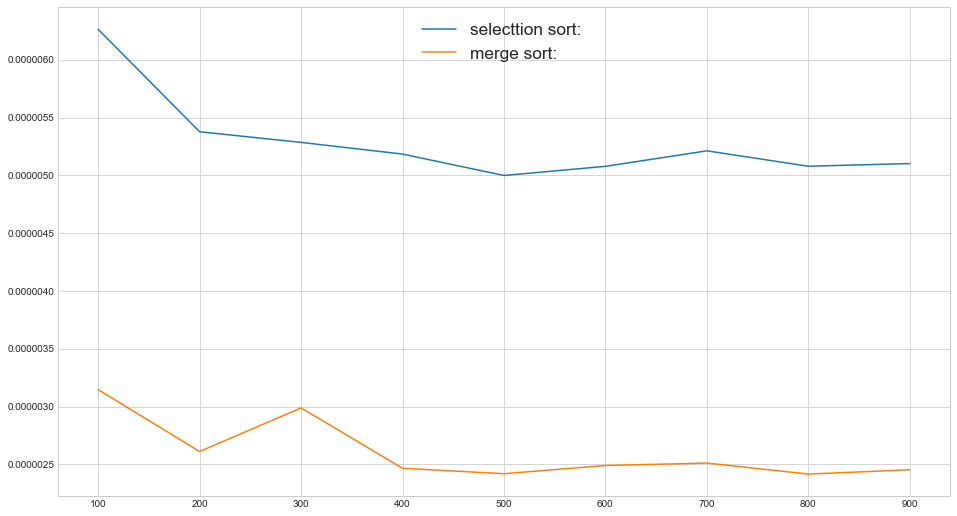

In [121]:
import itertools
from timeit import Timer
import random
import string

def selectionSort(alist):
   for fillslot in range(len(alist)-1,0,-1):
       positionOfMax=0
       for location in range(1,fillslot+1):
           if alist[location]>alist[positionOfMax]:
               positionOfMax = location

       temp = alist[fillslot]
       alist[fillslot] = alist[positionOfMax]
       alist[positionOfMax] = temp

def mergeSort(alist):
	if len(alist)>1:
		mid = len(alist)//2
		lefthalf = alist[:mid]
		righthalf = alist[mid:]

		mergeSort(lefthalf)
		mergeSort(righthalf)

		i=0
		j=0
		k=0
		while i<len(lefthalf) and j<len(righthalf):
			if lefthalf[i]<righthalf[j]:
				alist[k]=lefthalf[i]
				i=i+1
			else:
				alist[k]=righthalf[j]
				j=j+1
			k=k+1

		while i<len(lefthalf):
			alist[k]=lefthalf[i]
			i=i+1
			k=k+1

		while j<len(righthalf):
			alist[k]=righthalf[j]
			j=j+1
			k=k+1

import random
def generateRandomNumber(amount):
    li = []
    import random
    li.append(random.random())
    return li

sol5 = []
sol6 = []
if True:     
    for size in range(100, 1000, 100):
        M=10
        z = generateRandomNumber(size)
        t5 = Timer("selectionSort(z)", "from __main__ import selectionSort, z ")
        sol5.append(t5.timeit(number=M))

        t6 = Timer("mergeSort(z)", "from __main__ import mergeSort, z ")
        sol6.append(t6.timeit(number=M))
inc = 100
X= list ( range ( inc, inc*10, inc))
print(len(X))

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,9))

plt.plot(X, sol5, label='selecttion sort: ')
plt.plot(X, sol6, label='merge sort: ')

plt.legend(loc="upper center", fontsize="xx-large")
plt.show()


2.4 Given a list of numbers in random order, write an algorithm that works
      in O(nlog(n)) to find the kth smallest number in the list.

In [74]:
import heapq 

def findKthSmallest(li,k):
    heapq.heapify(li)
    for i in range(k-1):
        heapq.heappop(li)
    
    return heapq.heappop(li)

li = [12,14,4,6,1,5,10,13,7,2,3,9,8,11,15]

for i in range(1,len(li)+1):
    print("---------printing the %s th smallest number of the list"%i)
    print(findKthSmallest(list(li),i))
    print()

---------printing the 1 th smallest number of the list
1

---------printing the 2 th smallest number of the list
2

---------printing the 3 th smallest number of the list
3

---------printing the 4 th smallest number of the list
4

---------printing the 5 th smallest number of the list
5

---------printing the 6 th smallest number of the list
6

---------printing the 7 th smallest number of the list
7

---------printing the 8 th smallest number of the list
8

---------printing the 9 th smallest number of the list
9

---------printing the 10 th smallest number of the list
10

---------printing the 11 th smallest number of the list
11

---------printing the 12 th smallest number of the list
12

---------printing the 13 th smallest number of the list
13

---------printing the 14 th smallest number of the list
14

---------printing the 15 th smallest number of the list
15



2.5 Improve the algorithm from the previous problem to be linear? (Hints: the qsort algorithms.) 


In [88]:
import random
def quickselect(num, k):

    def select(lst, l, r, index):
        if r == l:
            return lst[l]
        pivot = random.randint(l, r)
        lst[l], lst[pivot] = lst[pivot], lst[l]
        i = l
        for j in range(l+1, r+1):
            if lst[j] < lst[l]:
                i += 1
                lst[i], lst[j] = lst[j], lst[i]
        lst[i], lst[l] = lst[l], lst[i]
        if index == i:
            return lst[i]
        elif index < i:
            return select(lst, l, i-1, index)
        else:
            return select(lst, i+1, r, index)
    if num is None or len(num) < 1:
        return None
    if k < 0 or k > len(num) - 1:
        raise IndexError()
    return select(num, 0, len(num) - 1, k)

a = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
for i in range(0, len(a)):
    print("---------printing the %s th smallest number of the list"%(i+1))
    print(quickselect(a, i))
    print()

---------printing the 1 th smallest number of the list
0

---------printing the 2 th smallest number of the list
1

---------printing the 3 th smallest number of the list
2

---------printing the 4 th smallest number of the list
3

---------printing the 5 th smallest number of the list
4

---------printing the 6 th smallest number of the list
5

---------printing the 7 th smallest number of the list
6

---------printing the 8 th smallest number of the list
7

---------printing the 9 th smallest number of the list
8

---------printing the 10 th smallest number of the list
9

---------printing the 11 th smallest number of the list
10



(Optional) Research perfect hash functions. Using a list of names (classmates, family members, etc.), generate the hash values using the perfect hash algorithm.